In [129]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skmisc import loess
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from scipy.linalg import svd 

In [3]:
# By:
# Olek Yardas [oyardas2]: coding and plotting
# Dreycen Foiles [dfoiles2]: coding and plotting

In [4]:
df = pd.read_csv('Coding3_Data.csv')

In [5]:
def smoother_diags(x, span):
    n = len(x)
    lev = np.zeros(n)
    for i in range(0, n):
        y = np.zeros(n)
        y[i] = 1
        loess_mod = loess.loess(x, y, span=span)
        loess_mod.fit()
        yi = loess_mod.outputs.fitted_values
        #_, yi, _ = loess_1d.loess_1d(x, y, degree=2, frac=span)
        #yi = interpolate.UnivariateSpline(x, y, s=span)(x)
        lev[i] = yi[i]
    return lev

In [6]:
def onestep_CV(x, y, span):
    n = len(x)
    loess_mod = loess.loess(x, y, span=span)
    loess_mod.fit()
    yhat = loess_mod.outputs.fitted_values
    r = y - yhat
    Slam_diags = smoother_diags(x, span)
    cv = (r / (1 - Slam_diags))**2
    #for i, s in enumerate(Slam_diags):
    #    cv.append((r[i] / (1 - s))**2)
    
    d = 1 - (np.sum(Slam_diags) / n)
    gcv = (r / d)**2
    
    return (np.mean(cv), np.mean(gcv))
    
   

In [7]:
def loocv(x, y, spans):
    m = len(spans)
    cv = np.zeros(m)
    gcv = np.zeros(m)
    
    for i in range(0, m):
        cv[i], gcv[i] = onestep_CV(x, y, spans[i])
        #cv[i] = tmp[0]
        #gcv[i] = tmp[1]
    return (cv, gcv)
    
    

In [8]:
spans = np.linspace(0.20, 0.90, 30)
cv, gcv = loocv(df['x'].values, df['y'].values, spans)

In [9]:
print(f"CV: {cv}")
best_idx = np.where(cv == np.min(cv))[0][0]
print(f"Optimum span for CV: {spans[best_idx]}")
print(f"GCV: {gcv}")
best_idx = np.where(gcv == np.min(gcv))[0][0]
print(f"Optimum span for GCV: {spans[best_idx]}")

CV: [12.4159107  12.4159107   2.2414735   1.53747419  1.53747419  1.50297981
  1.25917471  1.20462627  1.20462627  1.19037993  1.15681212  1.15681212
  1.13444224  1.12430566  1.17966375  1.17966375  1.18490225  1.17946416
  1.25091383  1.25091383  1.5135015   1.55356226  1.55356226  1.63617462
  1.69044635  1.76453363  1.76453363  1.97609351  2.01306392  2.03510792]
Optimum span for CV: 0.5137931034482759
GCV: [2.11016184 2.11016184 1.48920563 1.2460115  1.2460115  1.19010984
 1.17442296 1.13004199 1.13004199 1.1025399  1.06250346 1.06250346
 1.04913674 1.04042227 1.11884055 1.11884055 1.12286084 1.11926881
 1.18058478 1.18058478 1.46264622 1.51909081 1.51909081 1.62742935
 1.67437117 1.74454909 1.74454909 1.92569596 1.95871957 1.9798204 ]
Optimum span for GCV: 0.5137931034482759


In [10]:
loess_mod = loess.loess(df['x'],df['y'],span=.5)
loess_mod.fit() 
new_x = np.linspace(.01,.9,100)
new_y = loess_mod.predict(new_x)

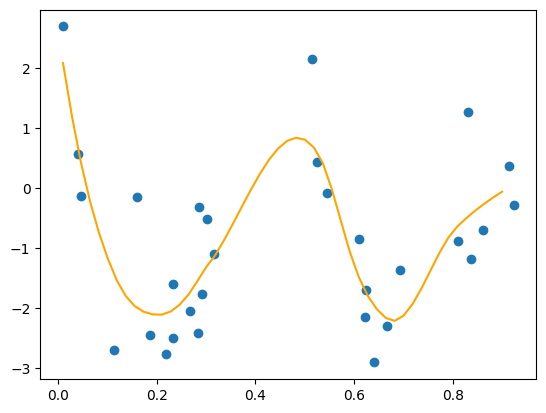

In [11]:
plt.scatter(df['x'], df['y'])
plt.plot(new_x,new_y,color='orange')

## Part 2

In [12]:
from sklearn.preprocessing import SplineTransformer
from sklearn.cluster import KMeans

In [13]:
RANDOM_SEED=7568

In [124]:
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data = df.loc[:, 'W0':'W51']
cdf = (data.T - data.mean(axis=1)).T
X = cdf.values

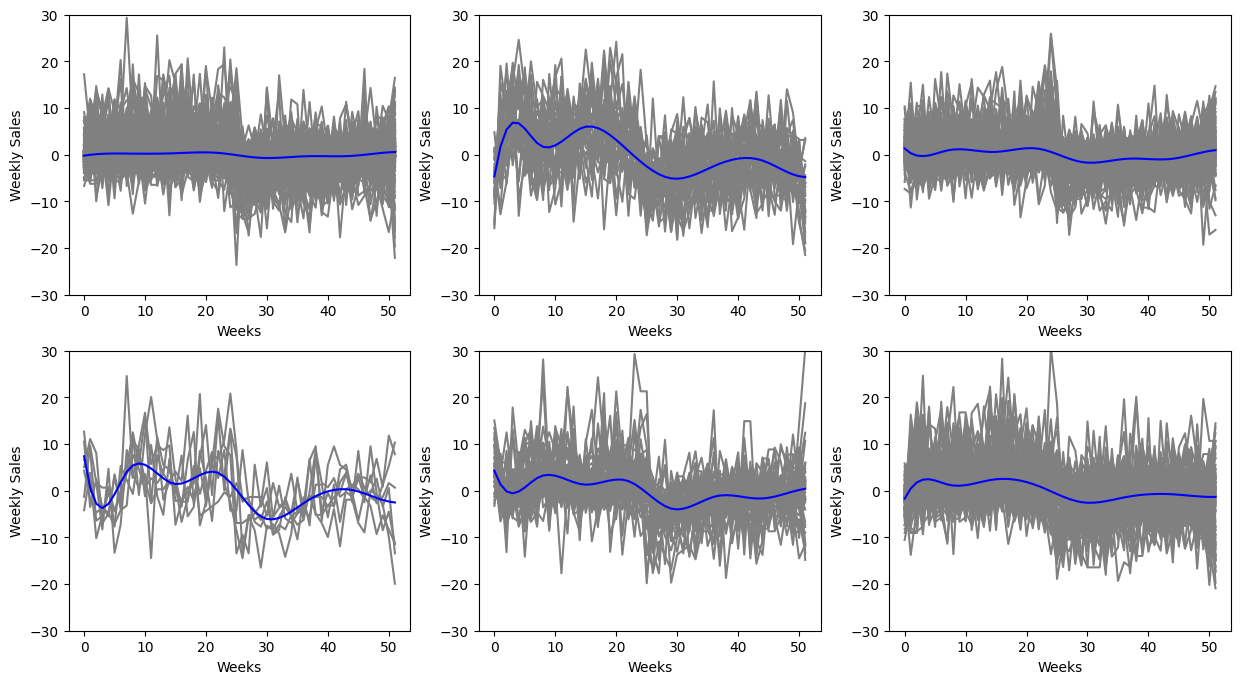

In [126]:
X = cdf.to_numpy()
X = X - np.mean(X, axis=1).reshape(-1,1)
x = np.arange(1,53,1).reshape(-1,1)
y = ndf['Normalized 0'].to_numpy().reshape(-1,1)
s = SplineTransformer(n_knots=8, degree=3, include_bias=False)
F = s.fit_transform(x, y)
B = (np.linalg.inv(F.T@F)@F.T@X.T).T

C = KMeans(n_clusters=6, random_state=RANDOM_SEED)
cluster_idx = C.fit_predict(B)
# Time series are columns of cluster_ts
cluster_ts = F@C.cluster_centers_.T

fig, ax = plt.subplots(2,3, figsize=(15,8))
for i in range(0, np.shape(cluster_ts)[1]):
    axi = ax.flatten()[i]
    cluster_idx_i = np.where(cluster_idx == i)[0]
    for j in cluster_idx_i:
        axi.plot(X[j,:], color='gray')
    axi.plot(cluster_ts[:,i] - np.mean(cluster_ts[:,i]), color='blue')
    axi.set_ylim(-30, 30)
    axi.set_ylabel('Weekly Sales')
    axi.set_xlabel('Weeks')

    

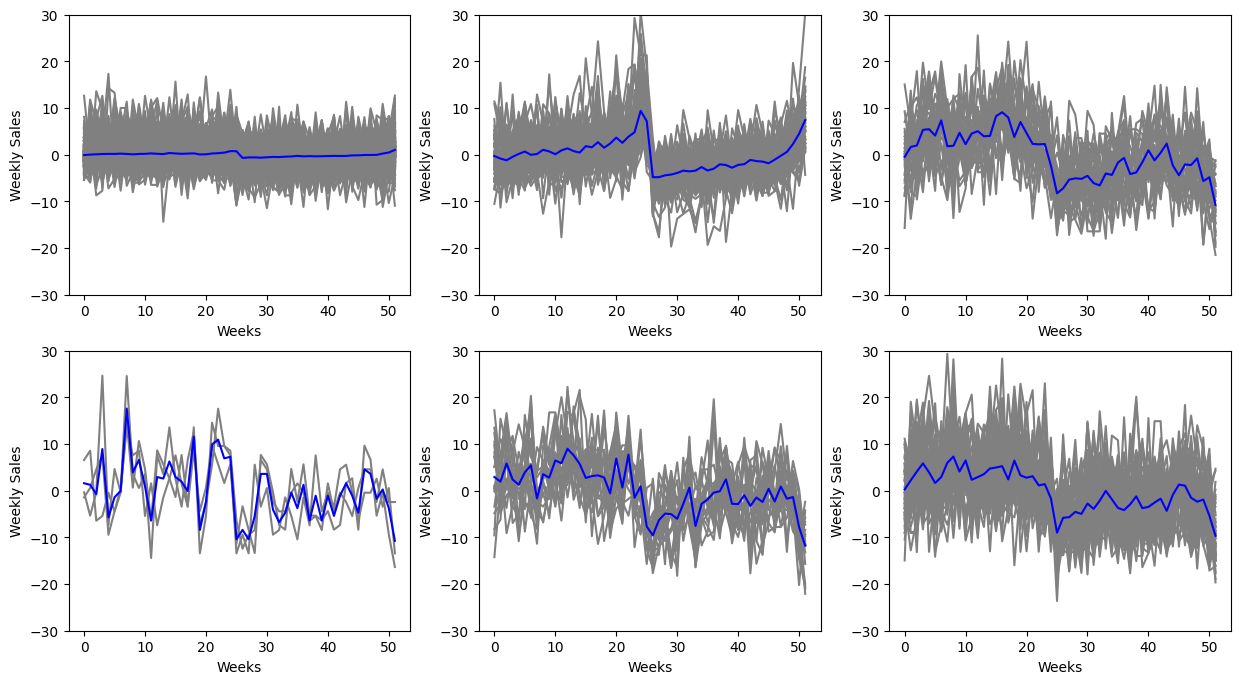

In [128]:


C = KMeans(n_clusters=6, random_state=RANDOM_SEED)
cluster_idx = C.fit_predict(X)
# Time series are columns of cluster_ts

fig, ax = plt.subplots(2,3, figsize=(15,8))
for i in range(len(C.cluster_centers_)):
    axi = ax.flatten()[i]
    cluster_idx_i = np.where(cluster_idx == i)[0]
    for j in cluster_idx_i:
        axi.plot(X[j,:], color='gray')

    centered_time_series = C.cluster_centers_[i]
    
    axi.plot(centered_time_series, color='blue')
    axi.set_ylim(-30, 30)
    axi.set_ylabel('Weekly Sales')
    axi.set_xlabel('Weeks')

    

# Part 3

In [204]:
np.shape(X)

In [207]:
def ridgeless(train, test, n_features):

    eps = 1e-10

    xtrain = train[:, 1:]
    ytrain = train[:, 0]

    xtest = test[:, 1:]
    ytest = test[:, 0]

    xtrain -= np.mean(xtrain, axis=0)
    xtest -= np.mean(xtrain, axis=0)

    U, D, Vh = svd(xtrain)

    k = np.sum(D > eps)

    F_train = xtrain @ Vh.T[:,:k] 
    F_test = xtest @ Vh.T[:,:k]

    coefs = F_train.T @ ytrain / np.sum(F_train**2,axis=0)

    b0 = np.mean(ytrain)

    preds = F_test[:,:n_features] @ coefs[:n_features] + b0
    return np.mean((ytest-preds)**2)


In [208]:

num_folds = 30
feature_range = np.arange(5,240)

comp_error = [] 


for n_features in feature_range:

    cverror = [] 

    for fold in range(num_folds):

        fold_train,fold_test = train_test_split(X, test_size=.75)        
        cverror.append(ridgeless(fold_train,fold_test, n_features))

    comp_error.append(np.median(np.array(cverror)))        

    

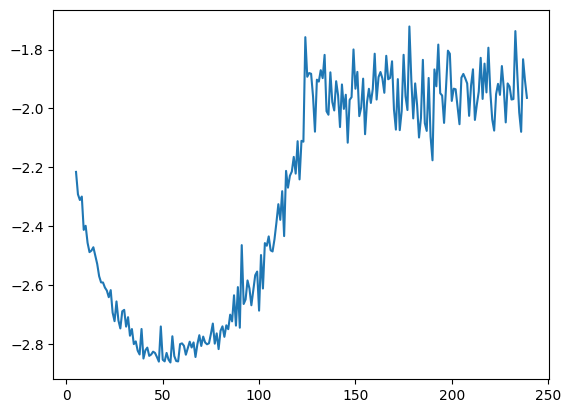

In [209]:
plt.plot(feature_range, np.log(comp_error))